## Load data

In [2]:
import json

In [2]:
data = json.loads(open('healthboards/items.json', 'r').read())

In [3]:
categories = list(map(lambda x: x['url'].split('/')[-2], data))

In [4]:
from collections import Counter

In [30]:
Counter(categories).most_common()

[('thyroid-disorders', 15545),
 ('foot-ankle-problems', 12257),
 ('womens-health', 11941),
 ('back-problems', 10434),
 ('general-health', 8209),
 ('bowel-disorders', 8185),
 ('dental-health', 7283),
 ('open-all-other-health-topics', 6641),
 ('acid-reflux-gerd', 6410),
 ('heart-disorders', 5889),
 ('menopause', 5854),
 ('herpes', 5315),
 ('high-low-blood-pressure', 5301),
 ('relationship-health', 5113),
 ('digestive-disorders', 5064),
 ('pregnancy', 5035),
 ('tmj-disorder-temporomandibular-joint', 5018),
 ('multiple-sclerosis', 4710),
 ('eye-vision', 4665),
 ('ear-nose-throat', 4576),
 ('skin-problems', 4151),
 ('birth-control', 4094),
 ('spinal-cord-disorders', 3776),
 ('addiction-recovery', 3644),
 ('fibromyalgia', 3565),
 ('allergies', 3496),
 ('lupus', 3294),
 ('inner-ear-disorders', 3173),
 ('kidney-disorders', 2978),
 ('urology', 2974),
 ('anemia', 2932),
 ('weight-loss', 2925),
 ('bipolar-disorder', 2822),
 ('liver-pancreas-disorders', 2662),
 ('cancer-cervical-ovarian', 2654),
 

In [10]:
 selected_items = [('general-health', 8209)]

In [5]:
selected_items = [
    ('digestive-disorders', 5064),
('addiction-recovery', 3644),
('sleep-disorders', 1748),
('smoking-cessation', 937),
('eating-disorder-recovery', 762),
('chronic-pain', 735),
('chronic-fatigue', 662),
('stress', 415),
('family-friends-addicts-alcoholics', 312),
('pain-management', 25)]

In [11]:
selected_categories = dict(selected_items).keys()

In [12]:
selected_posts = list(set(filter(lambda x: x, 
                                 map(lambda x: x['post'], 
                                     filter(lambda x: x['url'].split('/')[-2] in selected_categories, data)))))

In [13]:
len(selected_posts)

7133

In [14]:
json.dump(selected_posts, open('selected_posts.json', 'w'))

In [3]:
posts = json.loads(open('selected_posts.json', 'r').read())

In [3]:
posts = json.loads(open('general_health.json', 'r').read())

In [14]:
posts = list(set(filter(lambda x: x and not re.search(pat, x), map(lambda x: x['post'], data))))

In [15]:
len(posts)

272552

In [9]:
json.dump(data[:100], open('subset.json', 'w'))

In [2]:
data = json.loads(open('subset.json', 'r').read())

# Preprocess into sentences

In [4]:
import spacy
nlp = spacy.blank('en')
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [5]:
import nltk,re

def get_good_tokens(sentence):
    stopwords = nltk.corpus.stopwords.words('english')+['pron']        
    
    replaced_punctation = list(map(lambda token: re.sub('[^0-9A-Za-z]+', '', token), sentence))
    replaced_numbers = list(map(lambda token: re.sub('[0-9]+', '_num_', token), replaced_punctation))
    removed_punctation = list(filter(lambda token: token, replaced_numbers))
    removed_stopwords = list(filter(lambda token: token not in stopwords, removed_punctation))
    return removed_stopwords

In [6]:
import re

In [7]:
pat = re.compile(r'This message has been edited by \w+ \( edited [0-9]+ - [0-9]+ - [0-9]+ \)')

In [8]:
tokenized_posts = list(map(lambda post: 
                           list((get_good_tokens([token.text.lower() for token in sent]), sent)
                                for sent in nlp(post).sents if not re.search(pat, str(sent))), 
                    posts))

In [9]:
tokenized_posts = sum(tokenized_posts, [])

In [10]:
filtered_tokenized_posts = list(filter(lambda x: len(x[0])>=1 and len(x[0])<=7, tokenized_posts))

In [11]:
len(filtered_tokenized_posts)

115237

In [12]:
filtered_tokenized_posts[0]

(['dear', 'sarah_num_', 'writing', 'still', 'problems', 'knees'], Dear Sarah68:
 
 I am writing to you again because I still have problems with my knees.)

In [13]:
import pandas as pd

In [14]:
new_data = pd.DataFrame(filtered_tokenized_posts, columns=['clean_text', 'text'])

In [15]:
new_data.text = new_data.text.apply(lambda x: ' '.join([word.text for word in x]))

In [16]:
new_data.to_csv('general_health.tsv', sep='\t')

In [44]:
import numpy as np

In [50]:
all_lens = np.array(list(map(lambda post: 
                np.fromiter((len(sent) for sent in post), dtype=np.int), tokenized_posts)))

In [51]:
flat_lens = np.hstack(all_lens)

In [52]:
stat_general = {
    'min': flat_lens.min(),
    'max': flat_lens.max(),
    'mean': flat_lens.mean(),
    'std': flat_lens.std(),
}
stat_general

{'min': 1, 'max': 98, 'mean': 8.186475409836065, 'std': 7.67981583007181}

In [53]:
all_lens_stat = np.array(list(map(
    lambda x: np.array((np.min(x), np.max(x), np.mean(x), np.std(x))),
        list(map(lambda post: post[post<100], all_lens)))))

In [54]:
all_lens_stat.max()

98.0

In [55]:
flat_lens = np.hstack(list(filter(lambda post: len(post)>0, 
    map(lambda post: post[post<100], all_lens))))

In [56]:
len(all_lens_stat)

10

In [57]:
stat_per_post = dict(zip(['min', 'max', 'mean', 'std'], all_lens_stat.mean(axis=0)))

In [59]:
import matplotlib.pyplot as plt

{'min': 1, 'max': 98, 'mean': 8.186475409836065, 'std': 7.67981583007181}
{'min': 1.3, 'max': 37.2, 'mean': 9.018123833507762, 'std': 7.35792398786365}


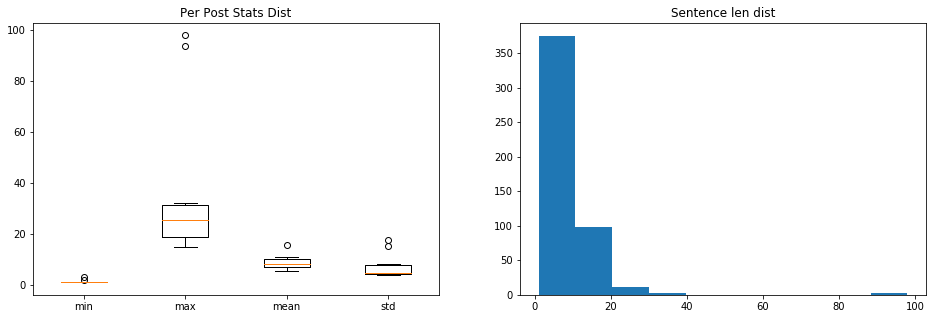

In [60]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.set_title('Per Post Stats Dist')
ax1.boxplot(all_lens_stat, labels=['min', 'max', 'mean', 'std'])

ax2.set_title('Sentence len dist')
ax2.hist(flat_lens, bins=10)

print(stat_general)
print(stat_per_post)


In [286]:
import numpy as np
import matplotlib.pyplot as plt

def text_dataset_stat(sentences, remove_stop_words=False):
    if remove_stop_words:
        all_lens = np.array(list(map(lambda post: 
                        np.fromiter(
                            (len([token.text for token in sent if not token.is_stop]) for sent in nlp(post).sents),
                             dtype=np.int), sentences)))
    else:
        all_lens = np.array(list(map(lambda post: 
                        np.fromiter((len(sent) for sent in nlp(post['post']).sents), dtype=np.int), 
                                 sentences)))
    flat_lens = np.hstack(all_lens)
    stat_general = {
        'min': flat_lens.min(),
        'max': flat_lens.max(),
        'mean': flat_lens.mean(),
        'std': flat_lens.std(),
    }
    all_lens_stat = np.array(list(map(
        lambda x: np.array((np.min(x), np.max(x), np.mean(x), np.std(x))), all_lens)))
    stat_per_post = dict(zip(['min', 'max', 'mean', 'std'], all_lens_stat.mean(axis=0)))
    
    fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
    
    ax1.set_title('Per Post Stats Dist')
    ax1.boxplot(all_lens_stat, labels=['min', 'max', 'mean', 'std'])
    
    ax2.set_title('Sentence len dist')
    ax2.hist(flat_lens)
    
    print(stat_general)
    print(stat_per_post)
    
    #return stat_general, stat_per_post

In [ ]:
print(text_dataset_stat(posts[1:], True))